<a href="https://colab.research.google.com/github/suneelcs1615/DeepLearning/blob/main/Unit-03_Convolution%20Neural%20Networks/Padding_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demonstration of Padding and Pooling with Tensorflow
This notebook is an Open Educational Resource (OER) developed for teaching and learning purposes. It is released under the Creative Commons Attribution–ShareAlike (CC BY-SA 4.0) International License.

This license allows anyone to use, copy, adapt, modify, translate, remix, and redistribute the material in any medium or format, provided proper credit is given to the original author and any modified versions are shared under the same license.

---
*Citation Format: Demonstration of Padding and Pooling with Tensorflow. Open Educational Resource (OER). Licensed under CC BY-SA 4.0*

### 1. Library Imports and Data Preparation
This section imports the necessary libraries (`numpy`, `matplotlib.pyplot`, `tensorflow`) and loads an image from the MNIST dataset. The image is then preprocessed by normalizing its pixel values and expanding its dimensions to fit the input shape expected by convolutional layers (batch_size, height, width, channels).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset and preprocess a single image
(x_train, _), _ = mnist.load_data()
image = x_train[0].astype(np.float32) / 255.0  # Normalize to [0, 1]
image = np.expand_dims(np.expand_dims(image, axis=0), axis=-1)  # Reshape to (1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2. Convolutional Layers with 'Same' and 'Valid' Padding
This block demonstrates the effect of two different padding strategies ('same' and 'valid') in `Conv2D` layers.
- **'Same' padding** tries to pad the input so that the output feature map has the same spatial dimensions as the input.
- **'Valid' padding** (no padding) means that the output feature map will be smaller than the input, as the convolution operation is only applied where the kernel fully overlaps with the input.

In [2]:
# Apply Conv2D with 'same' padding
same_conv = tf.keras.layers.Conv2D(1, (3,3), padding='same')(image)

# Apply Conv2D with 'valid' padding
valid_conv = tf.keras.layers.Conv2D(1, (3,3), padding='valid')(image)

print("Original Image Shape:", image.shape)
print("Same Padding Output Shape:", same_conv.shape)
print("Valid Padding Output Shape:", valid_conv.shape)

Original Image Shape: (1, 28, 28, 1)
Same Padding Output Shape: (1, 28, 28, 1)
Valid Padding Output Shape: (1, 26, 26, 1)


### 3. Pooling Layers (Max and Average Pooling)
This section applies `MaxPooling2D` and `AveragePooling2D` to the preprocessed image. Both pooling operations reduce the spatial dimensions of the feature map.
- **Max Pooling** selects the maximum value from each patch.
- **Average Pooling** computes the average value from each patch.

In [3]:
# Apply Max Pooling
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(image)

# Apply Average Pooling
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(image)

print("Max Pooling Output Shape:", max_pool.shape)
print("Average Pooling Output Shape:", avg_pool.shape)

Max Pooling Output Shape: (1, 14, 14, 1)
Average Pooling Output Shape: (1, 14, 14, 1)


### 4. Visualization of Pooling Results
Finally, this block visualizes the original MNIST image alongside the results of Max Pooling and Average Pooling. This helps in understanding how these operations downsample the image and capture different features.

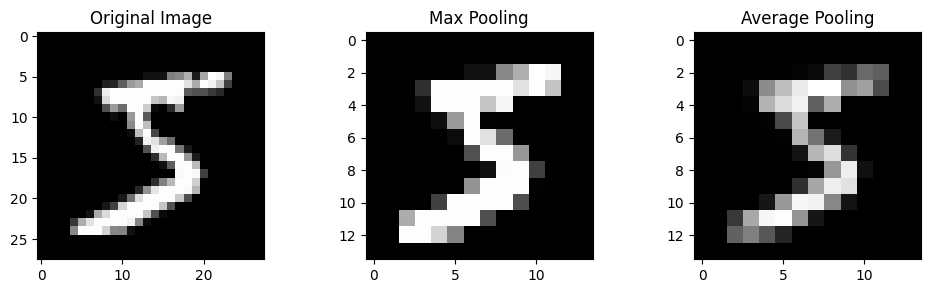

In [4]:
# Plotting the original image and the pooled outputs
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(max_pool[0, :, :, 0], cmap='gray')
plt.title("Max Pooling")

plt.subplot(1,3,3)
plt.imshow(avg_pool[0, :, :, 0], cmap='gray')
plt.title("Average Pooling")

plt.tight_layout()
plt.show()